***
<h1><center>Girls Who Code Humanize AI Challenge ! </center></h1>
***
<h2><center>Project Name: RoboDebt Advisor, Using Machine Learning  for Financial Education</center></h2>
***
<h4><center> Gia R. Nathan <br><br>James Logan High School, Union City, California<br><br> e-mail: <gn1188@nhusd.k12.ca.us></h4></center>

**Overview**: In this practical application, our goal is to use Decision Trees, in detecting a customer who is likely to default on his credit card debt.  We will utilize the dataset available from UC Irvine that is also hosted on Kaggle for this project. The datasets were made publicly available by UCI:__[UCI](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)__. 

> The basic idea is to develop a classifier using Random Forest algorithm, that takes in the UCI Credit Card transaction data and classifies it with a  label (in case it’s an “default”) assigns the numeric value of 1 (one), and a label (“for normal credit ”) assigns the numeric value of 0 (zero).  The classifier will be an application sitting on top of the RoboAdvisor platform. The application will take the customer data from Mint and pass it through the classifier to classify whether the customer account is heading for a credit card default. 

In [1]:
# Here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings('ignore')


## Step 1: Read in the Data

In [2]:
# We are reading the data which is stored in a comma separated value file and storing into a dataframe.
# A dataframe is a structure which comprises of rows and columns and can be thought of as something similar to 
# a Microsoft Excel spreadsheet. 
# The columns contain the attributes and the rows contain the information for one customer. 

data = pd.read_csv('./data/UCI_Credit_Card.csv')
data.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
21557,21558,50000.0,2,1,2,22,0,0,0,0,...,49443.0,20405.0,19494.0,1972.0,2369.0,3592.0,1029.0,723.0,874.0,0
21210,21211,50000.0,1,2,2,38,0,0,0,0,...,18253.0,18618.0,37495.0,1266.0,1298.0,1285.0,650.0,825.0,1582.0,0
619,620,200000.0,2,2,1,39,0,0,0,0,...,71629.0,70805.0,70718.0,3315.0,3088.0,2572.0,2559.0,2526.0,2620.0,0
15356,15357,440000.0,2,2,1,33,0,0,0,2,...,431200.0,440000.0,-6948.0,15003.0,30000.0,0.0,9000.0,788.0,0.0,0
20455,20456,10000.0,1,3,2,24,0,-1,-1,0,...,9379.0,9566.0,9766.0,273.0,8327.0,1200.0,342.0,354.0,438.0,0


In [3]:
# We are renaming the last column to make it more readable 

data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True) # drop column "ID"

# The next code snippet prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage,
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

As per UCI archive the attribute description is as follows:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [4]:
# Separating features (all columns used to predict the target ) and target which is the variable holding the prediction 
# In our case it is a 1 or a 0
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)

In [5]:
# The following method in pandas library is used to find the unique values from a series. 
#A series is a single column of a data frame. 

data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [6]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])

In [7]:
data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [8]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [9]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

### Step 3: Understanding the Features in the Dataset 

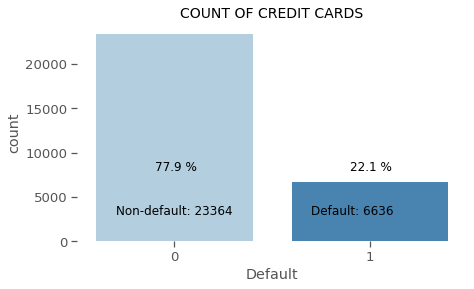

In [10]:
# The frequency of defaults
yes = data.Default.sum()
no = len(data)-yes

# Percentage
yes_perc = round(yes/len(data)*100, 1)
no_perc = round(no/len(data)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default',data=data, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

In [11]:
set_option('display.width', 100)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(data.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

             count       mean        std       min       25%       50%        75%       max
LIMIT_BAL  30000.0  167484.32  129747.66   10000.0  50000.00  140000.0  240000.00  1.00e+06
SEX        30000.0       1.60       0.49       1.0      1.00       2.0       2.00  2.00e+00
EDUCATION  30000.0       1.84       0.74       1.0      1.00       2.0       2.00  4.00e+00
MARRIAGE   30000.0       1.56       0.52       1.0      1.00       2.0       2.00  3.00e+00
AGE        30000.0      35.49       9.22      21.0     28.00      34.0      41.00  7.90e+01
PAY_0      30000.0      -0.02       1.12      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2      30000.0      -0.13       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3      30000.0      -0.17       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_4      30000.0      -0.22       1.17      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_5      30000.0      -0.27       1.13 

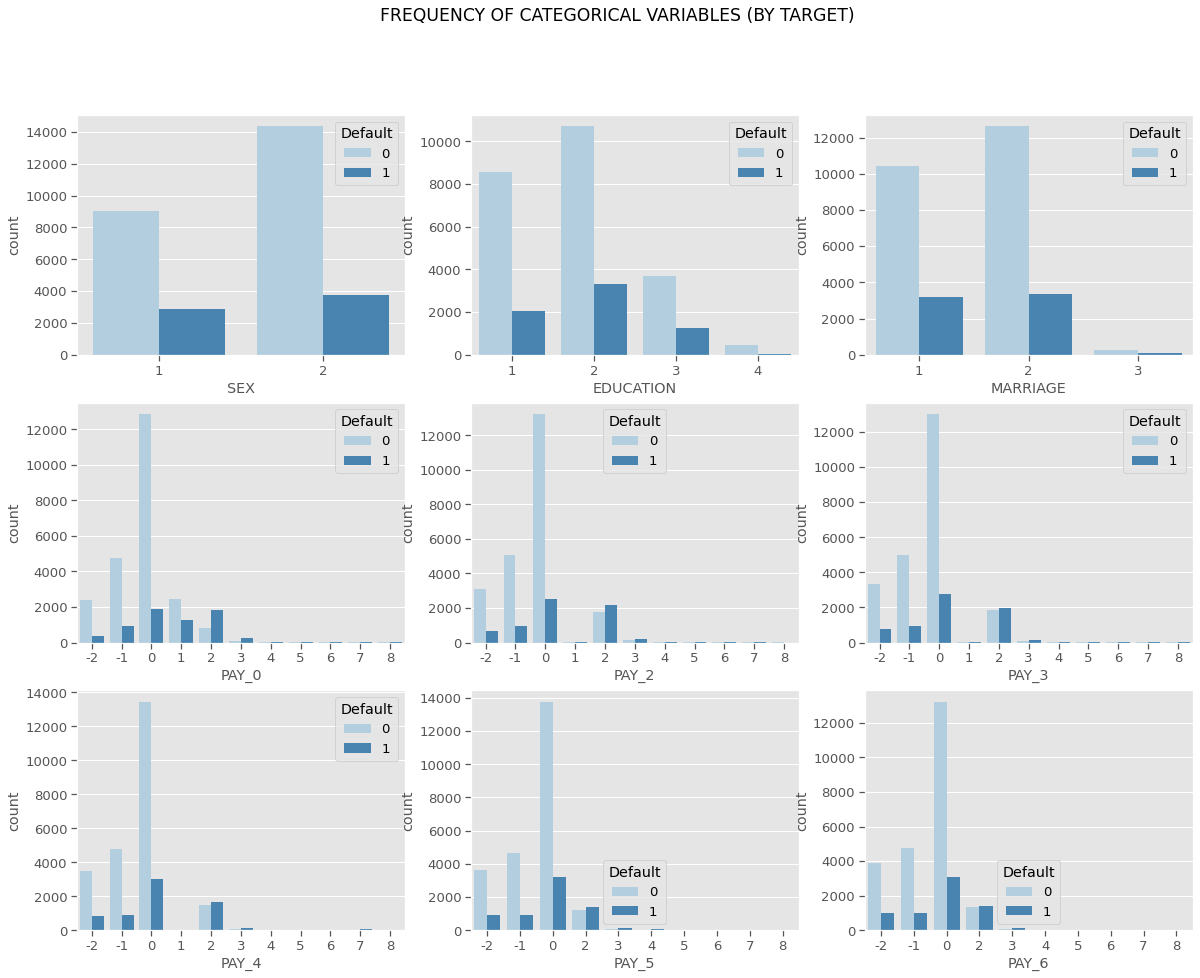

In [12]:
# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'Default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="Default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="Default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="Default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="Default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="Default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="Default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="Default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="Default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="Default", data=subset, palette="Blues", ax=axes[2,2]);

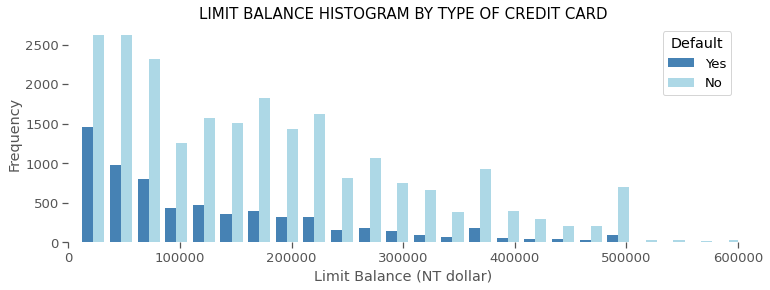

In [13]:
x1 = list(data[data['Default'] == 1]['LIMIT_BAL'])
x2 = list(data[data['Default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

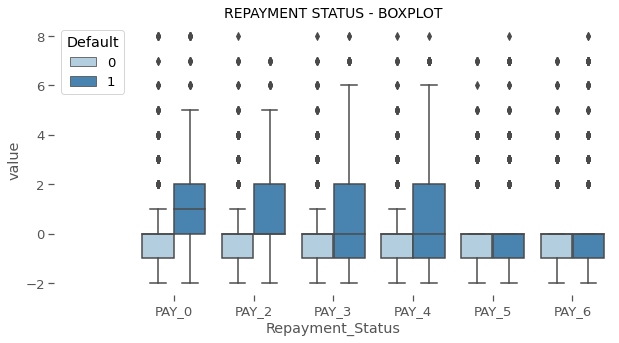

In [14]:
Repayment = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="Default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'Default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

In [15]:
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Default",
                    var_name="features",
                    value_name='value')

**Correlation Heatmap of the Customer transaction data Fields**

> The correlation matrix provides us with an indication of how well (or not so well) each feature is correlated with each other. The returned value will be between -1 and +1, with higher correlations tending toward these endpoints, and poorer correlations tending towards 0.

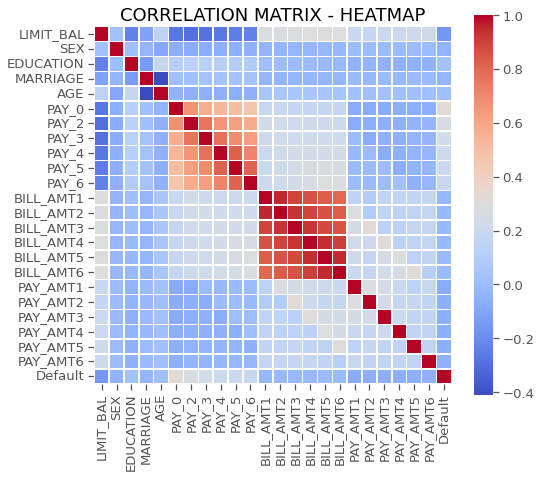

In [16]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

### Step 4: Preparing for Machine Learning: Train/Test Split

With the  data prepared, split it into a train and test set.

In [17]:
# Original dataset
X = data.drop('Default', axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [18]:
# Dataset with standardized features
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.2, stratify=y,
                                                                random_state=42)

In [19]:
# Dataset with three most important features
Ximp = stdX[['PAY_0', 'BILL_AMT1', 'PAY_AMT2']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp,y, test_size=0.2, stratify=y, random_state=42)

In [20]:
# Printing out last 15 lines of the dataset
data.tail(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
29985,240000.0,1,1,2,30,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29986,360000.0,1,1,2,35,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29987,130000.0,1,1,2,34,0,0,0,0,0,...,108047.0,93708.0,97353.0,3000.0,2000.0,93000.0,4000.0,5027.0,4005.0,0
29988,250000.0,1,1,1,34,0,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0
29989,150000.0,1,1,2,35,-1,-1,-1,-1,-1,...,780.0,0.0,0.0,9054.0,0.0,783.0,0.0,0.0,0.0,0
29990,140000.0,1,2,1,41,0,0,0,0,0,...,138262.0,49675.0,46121.0,6000.0,7000.0,4228.0,1505.0,2000.0,2000.0,0
29991,210000.0,1,2,1,34,3,2,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29992,10000.0,1,3,1,43,0,0,0,-2,-2,...,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,0
29993,100000.0,1,1,2,38,0,-1,-1,0,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29994,80000.0,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1


### Step 6: Creating a Random Forest Classifier and feeding it the prepared data

With the  data prepared, our model is now ready to learn the patterns.

Accuracy: 0.8171666666666667

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0093


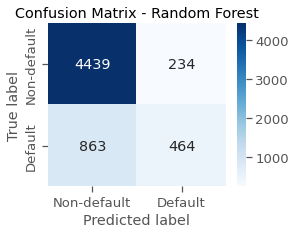

In [21]:


Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

### Step 7: Score the Model

What is the accuracy and how well is  our model doing? We can find this out using “Area Under the Curve” (AUC) of the “Receiver Operating Characteristic” (ROC)
plots. 

A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR). The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)). Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)). 

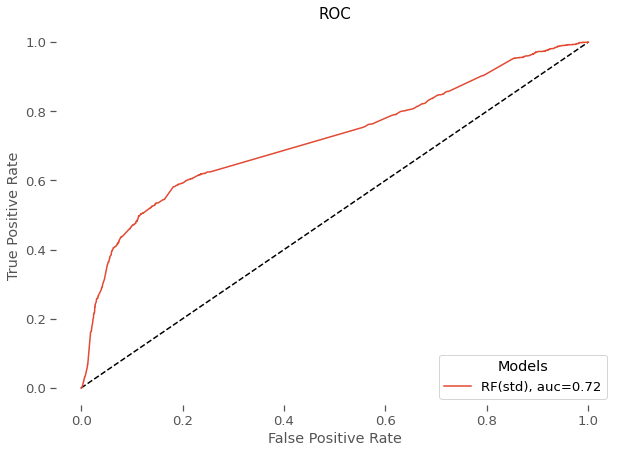

In [22]:
y_pred_proba_RF = Ran.predict_proba(Xstd_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(ystd_test,  y_pred_proba_RF)
auc4 = metrics.roc_auc_score(ystd_test, y_pred_proba_RF)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4,tpr4,label="RF(std), auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Step 8: Generate Predictions for new customer data based on our Random Forest Model.

The RF_Prediction Function is used to view the prediction from the Random Forest Model.

In [23]:
def RF_Prediction(creditCardData):    
   
     crd=pd.DataFrame(creditCardData)
    
     results = Ran.predict(crd)
    
     print("The predicted Credit  status is: $", results)
     print("")
     print("Here is how to interpret the credit default status of a customer:")
     print("")
     print("An outcome of  '1' indicates that there is high likely hood of a default on their credit card debt")
     print("")
     print("An outcome of '0' indicates that the customer has high probability of paying their credit card debt" )
     return

**Prepare a Random set of new Customer Credit Card data for prediction through our Random Forest model based classifier**

In [24]:
newCustomerCreditCardData=data[29991:]
newCustomerCreditCardData= newCustomerCreditCardData.drop("Default", axis=1)

**Generate some predictions**

In [25]:
RF_Prediction(newCustomerCreditCardData)

The predicted Credit  status is: $ [1 0 0 1 0 0 1 0 0]

Here is how to interpret the credit default status of a customer:

An outcome of  '1' indicates that there is high likely hood of a default on their credit card debt

An outcome of '0' indicates that the customer has high probability of paying their credit card debt


### Result Summary:
>**We can see that the Random Forest model  is fairly accurate. It got two predictions wrong which is in line with the accuracy rate on test data and ROC characteristics**

**Findings and Actionable Insights:**
> 1. The objective of this Machine Learning project was to build a classification model to predict whether a customer is likely to default on his or her credit card debt based 22 attributes found in their transaction data.


### Next Steps in the Random Forest Classifier Model Enhancement: 

> 1. Fine Tuning the model based on domain knowledge and feature importance results
2. We could reduce the dimensions/features further to tune the model.</li>
3. We could try other algorithms like XGBoost as a next step in improving the performance of the current Random Forest based  model
4. Based on what I have read in Medium and in youtube videos, advanced techniques like Neural Networks/Autoencoders and LSTM based model seems to be well suited for classification problems. This way you do not have to label the data.  However these techniques are well beyond my current abilities, as I recently learned about machine learning. Hopefully some time in the near future :-)  